# Cabecera de codigo para seleccionar el dispositivo a usar

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1" or "-1" if you want to use the cpu;
os.environ["CUDA_VISIBLE_DEVICES"]="-1";

# Importacion de Librerias

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from shutil import copy2 as copy
import multiprocessing.pool
from six.moves import range

import numpy as np

# Organizando el DataSet

In [3]:
%cd ../../DataSets

if os.path.isdir("hmdb51"):
    %cd hmdb51
else:
    os.mkdir("hmdb51")

/home/jefelitman/DataSets
/home/jefelitman/DataSets/hmdb51


In [10]:
ds_directory = "/home/jefelitman/DataSets/HMDB51/frames/laughing_out_her_brains_laugh_u_cm_np1_fr_med_3"

In [14]:
sorted(os.listdir(ds_directory))

['frame000001.jpg',
 'frame000002.jpg',
 'frame000003.jpg',
 'frame000004.jpg',
 'frame000005.jpg',
 'frame000006.jpg',
 'frame000007.jpg',
 'frame000008.jpg',
 'frame000009.jpg',
 'frame000010.jpg',
 'frame000011.jpg',
 'frame000012.jpg',
 'frame000013.jpg',
 'frame000014.jpg',
 'frame000015.jpg',
 'frame000016.jpg',
 'frame000017.jpg',
 'frame000018.jpg',
 'frame000019.jpg',
 'frame000020.jpg',
 'frame000021.jpg',
 'frame000022.jpg',
 'frame000023.jpg',
 'frame000024.jpg',
 'frame000025.jpg',
 'frame000026.jpg',
 'frame000027.jpg',
 'frame000028.jpg',
 'frame000029.jpg',
 'frame000030.jpg',
 'frame000031.jpg',
 'frame000032.jpg',
 'frame000033.jpg',
 'frame000034.jpg',
 'frame000035.jpg',
 'frame000036.jpg',
 'frame000037.jpg',
 'frame000038.jpg',
 'frame000039.jpg',
 'frame000040.jpg',
 'frame000041.jpg',
 'frame000042.jpg',
 'frame000043.jpg',
 'frame000044.jpg',
 'frame000045.jpg',
 'frame000046.jpg',
 'frame000047.jpg',
 'frame000048.jpg',
 'frame000049.jpg',
 'frame000050.jpg',


In [12]:
import cv2
frames = []
for frame in os.listdir(ds_directory):
    frames.append(cv2.imread(os.path.join(ds_directory,frame)))

In [13]:
frames = np.r_[frames]
frames.shape

(180, 256, 341, 3)

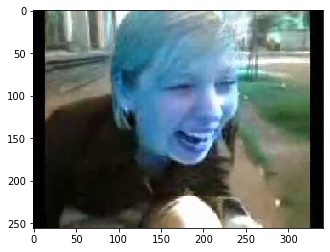

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(frames[0])

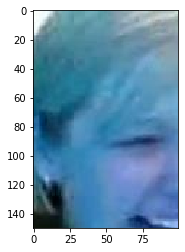

In [17]:
plt.imshow(frames[0,0:150,100:200])

In [3]:
splits_path = "/home/jefelitman/ucf101_splits"
files_path = os.listdir(splits_path)
files_path

['testlist02.txt',
 'trainlist01.txt',
 'classInd.txt',
 'trainlist03.txt',
 'testlist01.txt',
 'testlist03.txt',
 'trainlist02.txt']

In [4]:
files_path.pop(2)

'classInd.txt'

### Creacion de las carpetas de clase en los train

In [7]:
clases_file = open(os.path.join(splits_path,'classInd.txt'),"r")
clases = []
for clase in clases_file:
    clases.append(clase.split(" ")[1][:-1])
len(clases)

101

In [14]:
for split in ["split_1","split_2","split_3"]:
    split_path = os.path.join(ds_directory,split)
    for folder in os.listdir(split_path):
        for clase in clases:
            os.mkdir(os.path.join(split_path,folder,clase))

### Colocando los archivos en los splits segun corresponda

In [ ]:
#Renombrando las carpetas para dejarlas todas en minuscula
for folder in os.listdir("/home/jefelitman/DataSets/UCF101/frames"):
    src = os.path.join("/home/jefelitman/DataSets/UCF101/frames",folder)
    dst = os.path.join("/home/jefelitman/DataSets/UCF101/frames",folder.lower())
    os.rename(src,dst)

In [2]:
os.listdir("/home/jefelitman/DataSets/UCF101/flow/u")[:10]

['v_RockClimbingIndoor_g02_c02.bin',
 'v_PlayingPiano_g24_c04',
 'v_RopeClimbing_g20_c02',
 'v_HulaHoop_g16_c03.bin',
 'v_BlowingCandles_g18_c01',
 'v_BreastStroke_g01_c03.bin',
 'v_Rowing_g05_c04',
 'v_Swing_g16_c01.bin',
 'v_ParallelBars_g11_c04.bin',
 'v_Nunchucks_g17_c02.bin']

In [16]:
origen_path = "/home/jefelitman/DataSets/UCF101/frames"
for file in files_path:
    archivo = open(os.path.join(splits_path,file),"r")
    
    if file.endswith("01.txt"):
        split_path = os.path.join(ds_directory,"split_1")
    elif file.endswith("02.txt"):
        split_path = os.path.join(ds_directory,"split_2")
    elif file.endswith("03.txt"):
        split_path = os.path.join(ds_directory,"split_3")
    if file.startswith("train"):
        split_path = os.path.join(split_path,"train")
    elif file.startswith("test"):
        split_path = os.path.join(split_path,"test")
    
    for linea in archivo:
        clase = linea.split("/")[0]
        video = linea.split("/")[1][:-1]
        dir_ori_path = os.path.join(origen_path,video.lower())
        dest = os.path.join(split_path,clase,video.lower())
        os.mkdir(dest) #Creamos la carpeta del destino
        
        for frame in os.listdir(dir_ori_path):
            ori = os.path.join(dir_ori_path,frame)
            copy(ori,dest)

In [13]:
#Funcion para eliminar carpetas dentro de los frames que correspondan al flujo o algo similar
from shutil import rmtree as delete
for video in sorted(os.listdir("/home/jefelitman/DataSets/UCF101/frames")):
    frames_path = os.path.join("/home/jefelitman/DataSets/UCF101/frames",video)
    for frame in sorted(os.listdir(frames_path)):
        file = os.path.join("/home/jefelitman/DataSets/UCF101/frames",video,frame)
        if os.path.isdir(file):
            delete(file,ignore_errors=True)

In [11]:
#Funcion para comprobar que cada split haya quedado bien hecho
for file in files_path:
    archivo = list(open(os.path.join(splits_path,file),"r"))
    
    if file.endswith("01.txt"):
        split_path = os.path.join(ds_directory,"split_1")
    elif file.endswith("02.txt"):
        split_path = os.path.join(ds_directory,"split_2")
    elif file.endswith("03.txt"):
        split_path = os.path.join(ds_directory,"split_3")
    if file.startswith("train"):
        mode_path = os.path.join(split_path,"train")
    elif file.startswith("test"):
        mode_path = os.path.join(split_path,"test")
    
    elementos = 0
    for clase in sorted(os.listdir(mode_path)):
        videos_path = os.path.join(mode_path,clase)
        elementos += len(os.listdir(videos_path))
        
    if len(archivo) == elementos:
        print(True)
    else:
        print(False)

True
True
True
True
True
True


In [10]:
#Funcion para eliminar la carpeta .ipynb_checkpoints
import os
from shutil import rmtree as delete
eliminados = 0
root = "/home/jefelitman/DataSets/ucf101/"
splits = sorted(os.listdir(root))

for split in splits:
    split_path = os.path.join(root,split)
    if split == '.ipynb_checkpoints':
        delete(split_path,ignore_errors=True)
        eliminados += 1
        break
    modes = sorted(os.listdir(split_path))
    
    for mode in modes:
        mode_path = os.path.join(split_path,mode)
        if mode == '.ipynb_checkpoints':
            delete(mode_path,ignore_errors=True)
            eliminados += 1
            break
        clases = sorted(os.listdir(mode_path))
        
        for clase in clases:
            clase_path = os.path.join(mode_path,clase)
            if clase == '.ipynb_checkpoints':
                delete(clase_path,ignore_errors=True)
                eliminados += 1
                break
            videos = sorted( os.listdir( clase_path ) )
            
            for video in videos:
                video_path = os.path.join(clase_path,video)
                if video == '.ipynb_checkpoints':
                    delete(video_path,ignore_errors=True)
                    eliminados += 1
                    break
                frames = sorted( os.listdir(video_path) )
                
                for frame in frames:
                    frame_path = os.path.join(video_path,frame)
                    if frame == '.ipynb_checkpoints':
                        delete(frame_path,ignore_errors=True)
                        eliminados += 1
                        break

print(eliminados)

0


In [7]:
#Funcion para revisar los frames en las carpetas de train, test de todos los splits
minframes = 200
mode_path = "/home/jefelitman/DataSets/ucf101/split_3/test"
for clase in sorted(os.listdir(mode_path)):
    clase_path = os.path.join(mode_path,clase)
    for video in sorted(os.listdir(clase_path)):
        video_path = os.path.join(clase_path,video)
        if len(os.listdir(video_path)) < minframes:
            minframes = len(os.listdir(video_path))
            minvideo = video_path

print(minframes)
print(minvideo)

29
/home/jefelitman/DataSets/ucf101/split_3/test/PushUps/v_pushups_g16_c04
